In [48]:
import pandas as pd
import numpy as np
%matplotlib inline

url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)
data.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
# HOw manay people Survied on the titanic
col = 'Survived'
data[col].sum()

342

In [6]:
#How many men vs women survived the titanic ? 
data.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [7]:
#What were the survival rates of men vs women ?
col = 'Survived'
data.groupby('Sex').mean()[col]

Sex
female    0.742038
male      0.190227
Name: Survived, dtype: float64

In [8]:
# How many in each passenger class survived ?
data.groupby('Pclass').sum()['Survived']



Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
# What is the survival rate of each passenger class ?
data.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64

In [44]:
# Find the survival rate for the thrid class passengers male vs femal that paid over the average thrid class fare

m = data.loc[data['Pclass'] ==3 ]['Fare'].mean()

data.loc[(data['Pclass'] ==3) & (data['Fare']> m)].groupby('Sex').mean()['Survived']

Sex
female    0.376812
male      0.182927
Name: Survived, dtype: float64

In [45]:
# Find the survival rate for the thrid class passengers male vs femal that paid under the average thrid class fare

m = data.loc[data['Pclass'] ==3 ]['Fare'].mean()

data.loc[(data['Pclass'] ==3) & (data['Fare'] < m)].groupby('Sex').mean()['Survived']

Sex
female    0.613333
male      0.122605
Name: Survived, dtype: float64

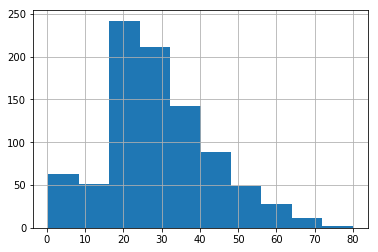

In [50]:
data['Age'].hist()

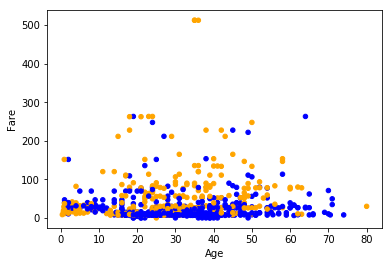

In [65]:
def color(x):
    if x == 1:
        return 'orange'
    else:
        return 'blue'
    
data['Survived_color'] = list(map(color, data['Survived']))
data.plot.scatter(x = 'Age', y = 'Fare', c= data['Survived_color'])

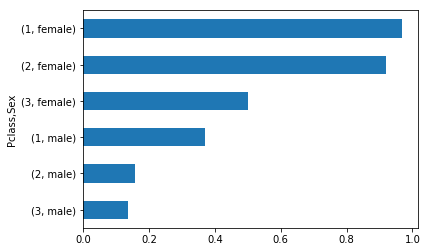

In [79]:
def color(x):
    if x == 1:
        return 'orange'
    else:
        return 'blue'
    
data['Survived_color'] = list(map(color, data['Survived']))
data.groupby(['Pclass', 'Sex']).mean()['Survived'].sort_values().plot.barh()
